<a href="https://colab.research.google.com/github/GabrielChuchuca/EXAMEN1INTER-SIMULACION/blob/main/EXAMEN1INTERCICLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tweepy
import tweepy
from datetime import datetime, date, time, timedelta
import calendar
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import json

# Cómo conectar el cuaderno a la la Unidad de Google Drive
import os

# Importamos el paquete propio de Google Colab para acceder a la Unidad
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
consumer_key = "L6XdJhLezyZ98rm5mZIkhNYEn"
consumer_secret = "cNs8bWMG2QujCnJvKRaQXk98GhF97VASfvVqQeaPyms0AGarMv"
access_token = "1334387936847155200-1jrvfm9bnRV9nieDpkb6c44lS8JnCh" 
access_token_secret = "78ri5Nctcyf1j0DDYLswrKgVM8wWqtbb4CmrfTttu0Ran"

In [ ]:
#SE SETEA LOS VALORES DEL TOKEN
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#SE CREA EL OBJETO API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
#Se muestra las publicaciones del usuario
cont = 0
usuario = 'LassoGuillermo'
twt = api.user_timeline(usuario, tweet_mode="extended",count='200')
for tweet in twt:
  cont += 1
  print("TITULO/CONTENIDO")
  print(tweet.full_text)
  print("URL DEL TWEET")
  print("https://twitter.com/"+usuario+"/status/"+str(tweet.id))
  print("CANTIDAD DE PALABRAS DEL TWEET")
  a = tweet.full_text.split()
  print(len(a) - 1)
  print("CANTIDAD DE RETWEETS DEL TWEET")
  print(tweet.retweet_count)
  print("CANTIDAD DE FAVORITOS DEL TWEET")
  print(tweet.author.favourites_count)
  print("FECHA")
  f = datetime.today() - tweet.created_at
  print(f.days)
  print("-------")

    #fecha, hashtag, geolocalizacion,usuarios
    #,mensaje,visualizacion,follows,tweet
    #SE IMPRIME LAS PUBLICACIONES 
print("que mas ve", cont)

In [ ]:
l_contenido = []
l_url = []
l_n_palabras = []
l_n_favoritos = []
l_n_dias_t = []
l_n_retweet = []
cont = 0
for tweet in tweepy.Cursor(api.search,q='guillermo lasso', lang="es",tweet_mode="extended").items(5000):
#for tweet in api.search(q="guillermo lasso", tweet_mode="extended", count="115"):
  if 'retweeted_status' in tweet._json:
    cont += 1
    print("IFFFFFFFF")
    print("TITULO/CONTENIDO")
    #print(tweet._json['retweeted_status']['full_text'])
    l_contenido.append(tweet.retweeted_status.full_text)
    
    print("URL DEL TWEET")
    #print("https://twitter.com/user/status/"+str(tweet.id))
    l_url.append("https://twitter.com/user/status/"+str(tweet.id))
    
    print("CANTIDAD DE PALABRAS DEL TWEET")
    a = tweet.retweeted_status.full_text.split()
    #print(len(a) - 1)
    l_n_palabras.append(len(a) - 1)
    
    print("CANTIDAD DE FAVORITOS DEL TWEET")
    #print(tweet._json['favorite_count'])
    l_n_favoritos.append(tweet.favorite_count)
    
    print("FECHA")
    f = datetime.today() - tweet.created_at
    #print(f.days)
    l_n_dias_t.append(f.days)
    
    print("CANTIDAD DE RETWEETS DEL TWEET")
    #print(tweet._json['retweet_count'])
    l_n_retweet.append(tweet.retweet_count)
    print("-------")
  else:
    cont += 1
    print("ELSEEEEEEEE")
    print("TITULO/CONTENIDO")
    #print(tweet._json['retweeted_status']['full_text'])
    l_contenido.append(tweet.full_text)
    print("URL DEL TWEET")
    #print("https://twitter.com/user/status/"+str(tweet.id))
    l_url.append("https://twitter.com/user/status/"+str(tweet.id))
    print("CANTIDAD DE PALABRAS DEL TWEET")
    a = tweet.full_text.split()
    #print(len(a) - 1)
    l_n_palabras.append(len(a) - 1)
    print("CANTIDAD DE FAVORITOS DEL TWEET")
    #print(tweet._json['favorite_count'])
    l_n_favoritos.append(tweet.favorite_count)
    print("FECHA")
    f = datetime.today() - tweet.created_at
    #print(f.days)
    l_n_dias_t.append(f.days)
    print("CANTIDAD DE RETWEETS DEL TWEET")
    #print(tweet._json['retweet_count'])
    l_n_retweet.append(tweet.retweet_count)
    print("-------")


print(cont)

Se han truncado las últimas 5000 líneas del flujo de salida.
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CA

Rate limit reached. Sleeping for: 856


Se han truncado las últimas 5000 líneas del flujo de salida.
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD

In [ ]:
exa = {'contenido':l_contenido, 'url':l_url, '# de palabras':l_n_palabras, '# de favoritos':l_n_favoritos, '# de dias transcurridos':l_n_dias_t, '# de veces retweetiadas':l_n_retweet}
df = pd.DataFrame(data = exa)
df
#for i in df['url']:
#  print(i)

,contenido,url,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
0,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427588801...,24,0,0,365
1,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427179898...,24,0,0,365
2,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003425116342...,24,0,0,365
3,#Ecuador🇨🇴 El gobierno de Guillermo Lasso: ¿cr...,https://twitter.com/user/status/14003413694079...,15,0,0,18
4,#ENVIVO | El presidente Guillermo Lasso anunci...,https://twitter.com/user/status/14003413601007...,16,0,0,265
...,...,...,...,...,...,...
4995,".@LeonidasIzaSal1:""Nosotros no nos movilizamos...",https://twitter.com/user/status/13997314690404...,33,0,1,3
4996,🔴Guillermo Lasso durante la presentación del p...,https://twitter.com/user/status/13997314667503...,23,0,1,140
4997,"""Nunca más al servicio del partido del Gobiern...",https://twitter.com/user/status/13997314596913...,26,0,1,58
4998,Ecuador: presidente Lasso pide a empresas priv...,https://twitter.com/user/status/13997309667641...,12,0,1,10


In [ ]:
#df.to_csv('/content/drive/MyDrive/examen1ersimulacion/informacion_twitter.csv',index = False)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/examen1ersimulacion/informacion_twitter.csv')
#df2.columns = ['contenido','url','# de palabras','# de favoritos','dias transcurridos','# de retweets']
df2

,contenido,url,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
0,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427588801...,24,0,0,365
1,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427179898...,24,0,0,365
2,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003425116342...,24,0,0,365
3,#Ecuador🇨🇴 El gobierno de Guillermo Lasso: ¿cr...,https://twitter.com/user/status/14003413694079...,15,0,0,18
4,#ENVIVO | El presidente Guillermo Lasso anunci...,https://twitter.com/user/status/14003413601007...,16,0,0,265
...,...,...,...,...,...,...
4995,".@LeonidasIzaSal1:""Nosotros no nos movilizamos...",https://twitter.com/user/status/13997314690404...,33,0,1,3
4996,🔴Guillermo Lasso durante la presentación del p...,https://twitter.com/user/status/13997314667503...,23,0,1,140
4997,"""Nunca más al servicio del partido del Gobiern...",https://twitter.com/user/status/13997314596913...,26,0,1,58
4998,Ecuador: presidente Lasso pide a empresas priv...,https://twitter.com/user/status/13997309667641...,12,0,1,10


In [ ]:
ll = []
for i in df2['# de veces retweetiadas']:
  ll.append(i)
print(max(ll))

9534


In [ ]:
df2.describe()

,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,27.782400,2.75800,0.338800,127.923000
std,10.987429,41.55278,0.473349,198.916489
min,3.000000,0.00000,0.000000,0.000000
25%,19.000000,0.00000,0.000000,6.000000
50%,24.000000,0.00000,0.000000,73.000000
75%,37.000000,0.00000,1.000000,206.000000
max,63.000000,1617.00000,1.000000,9534.000000


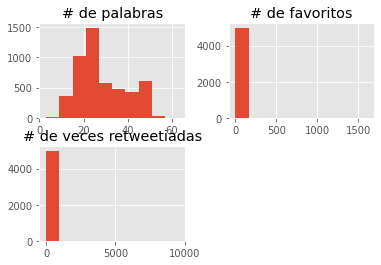

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
df2.drop(['contenido','url', '# de dias transcurridos'],1).hist()
plt.show()

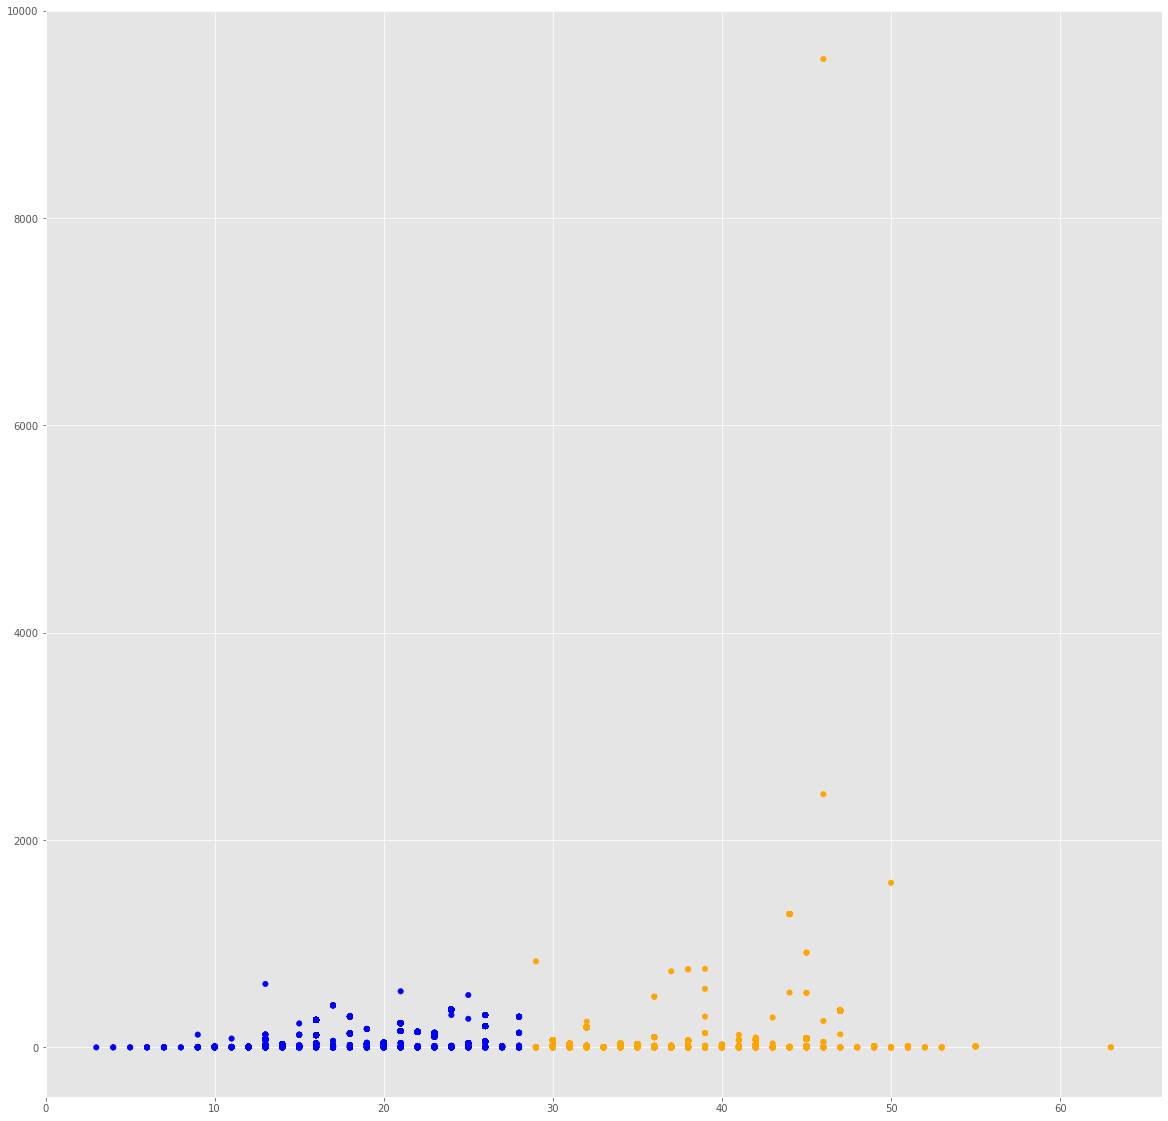

In [ ]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = df2[(df2['# de palabras'] <= 3500) & (df2['# de veces retweetiadas'] <= 80000)]

f1 = filtered_data['# de palabras'].values
f2 = filtered_data['# de veces retweetiadas'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['# de palabras']>28):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.gcf().set_size_inches(20, 20)
plt.show()

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["# de palabras"]]
X_train = np.array(dataX)
y_train = filtered_data['# de veces retweetiadas'].values

In [ ]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.13786139]
Independent term: 
 96.31047958549516
Mean squared error: 39403.58
Variance score: 0.00


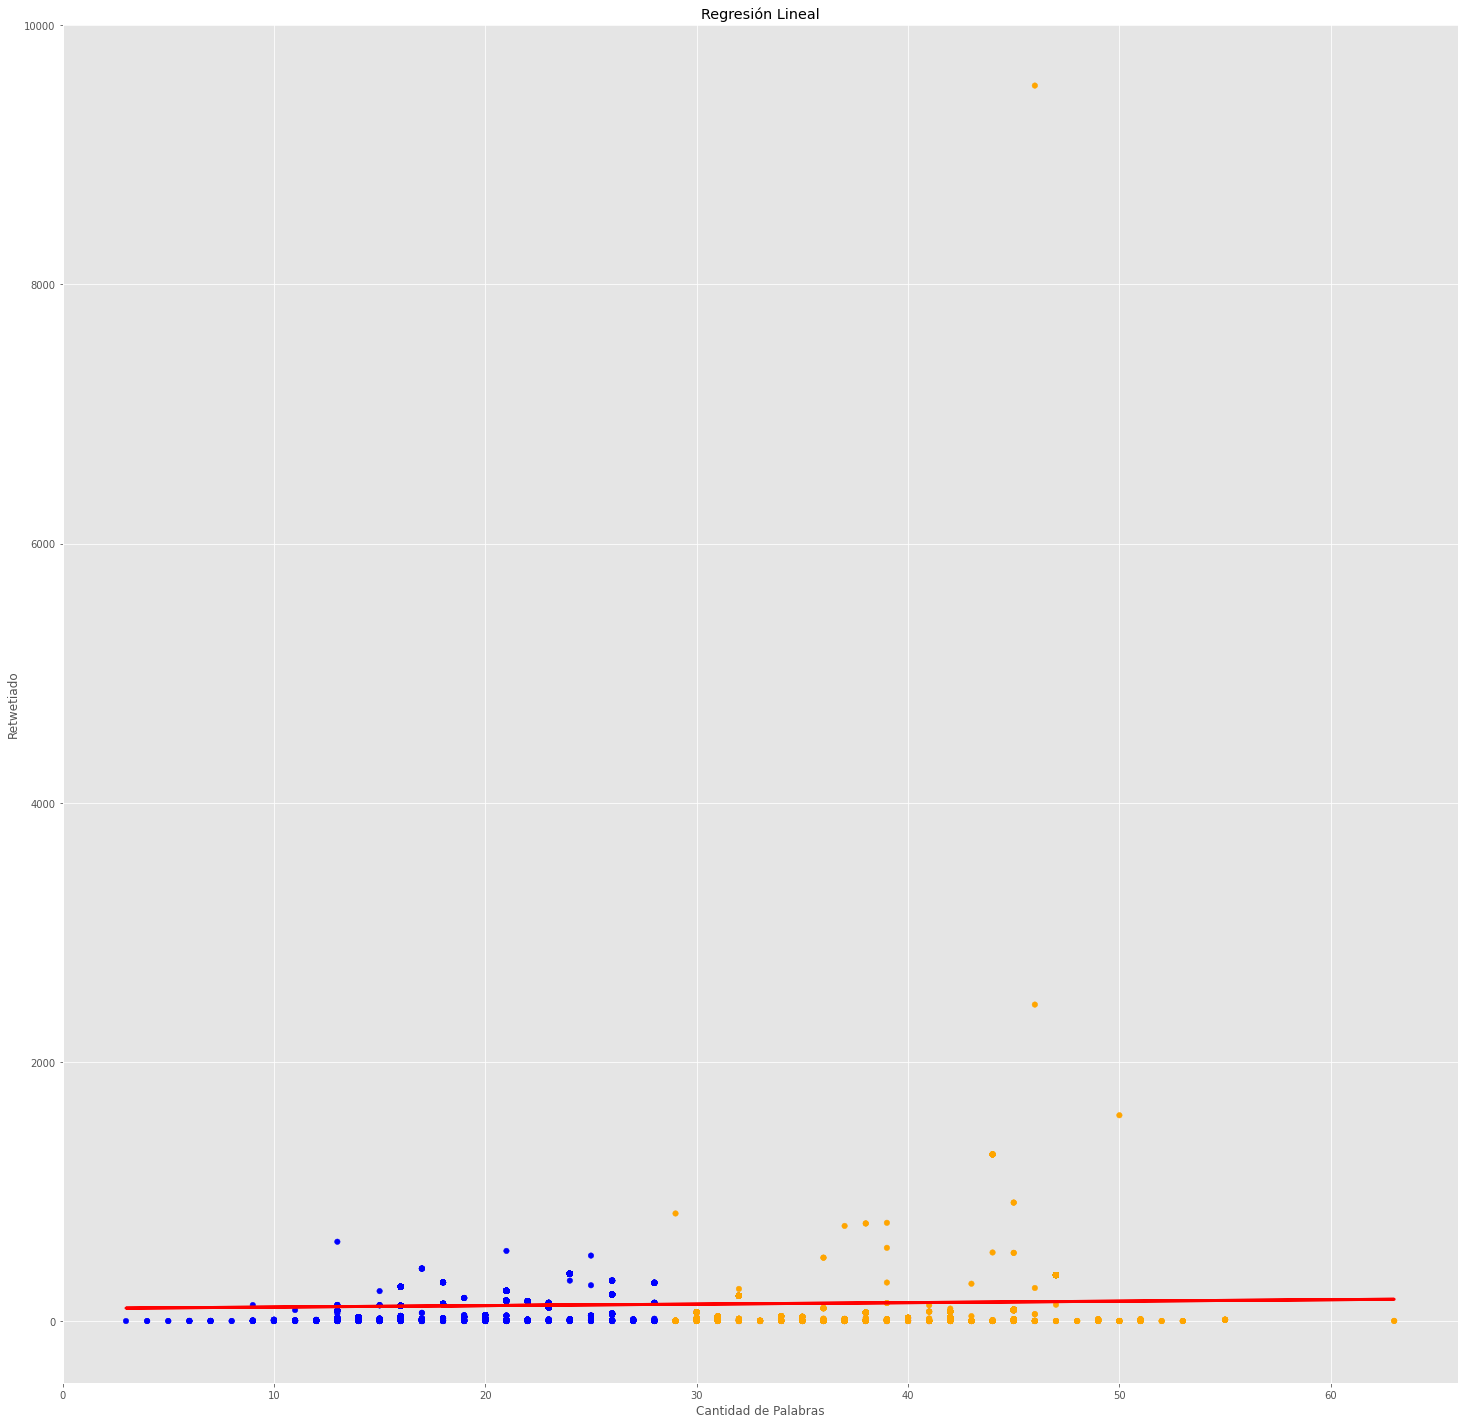

In [ ]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Retwetiado')
plt.title('Regresión Lineal')
plt.gcf().set_size_inches(25, 25)
plt.show()

In [ ]:

#Vamos a comprobar:
# Quiero predecir cuántos "Retweet" voy a obtener por un tweet con 63 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[63]])
print(int(y_Dosmil))

167
